# Análisis exploratorio de datos

## 1. Introducción 

El conjunto de datos que se pretende analizar en este notebook se denomina **EXIST** y representa un problema de **detección y clasificación de sexismo** a partir de conjuntos de **textos en español e inglés** procedentes de las redes sociales **Twitter y Gab**. Esta temática surge en un formato competitivo teniendo lugar su primera edición en el año 2021 con una segunda recientemente terminada en el presente año 2022.

En este notebook se detallan los aspectos más relevantes acerca de la **composición de los conjuntos de entrenamiento y validación, así como análisis estadísticos y visuales** que ayuden a comprender tanto la temática como los datos disponibles para abordarla. Para ello se ha hecho uso de los artículos [*Overview of EXIST 2021*](http://diposit.ub.edu/dspace/bitstream/2445/181257/1/715155.pdf) y [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), en los que se describe la motivación y los objetivos del problema del sexismo, los procesos de recolección de datos, normativa de la competición, evaluación de resultados y las propuestas de los participantes.

## 2. Estructura del notebook

1. Introducción al notebook
2. Estructura del notebook
3. Recopilación de datos
4. Muestreo de datos
5. Etiquetado de datos
6. Instalación y carga de librerías
7. Lectura y carga de datos
8. Análisis de características
9. Análisis de textos
-------------------------------------------------------------

* Procesamiento estándar de texto
* Histograma del número de caracteres en cada texto
* Histogramas del número de palabras en cada texto
* Nube de palabras con unigramas
* Bigramas
* Trigramas
* Detección de tópicos
* Análisis de sentimientos
[Fuente](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)

## 3. Recopilación de datos

El proceso de recolección de datos fue orientado primeramente a establecer un **conjunto de expresiones populares y términos sexistas**, en español e inglés, que manifiestan una infravolaración hacia el rol de la mujer en la sociedad. Para ello se inspiraron en trabajos previamente realizados en el mismo área, cuentas y hashtags populares de redes sociales, etc. A continuación se resumen los métodos de recolección de datos diferenciados por la red social tomada como fuente de datos.

### 3.1. Twitter

La recogida de datos procedentes de esta plataforma social se elaboró en **dos períodos**, una primera fase de Diciembre de 2020 hasta Febrero de 2021 para componer la **primera versión** de un dataset de entrenamiento y otro de validación. Mientras que en la **segunda edición** de la competición el objetivo consistía en **ampliar el conjunto de datos de validación** y por ende se realizó una segunda fase de recopilación de tweets durante el mes de Enero de 2022. En sendos intervalos se aplicaron **técnicas de balanceado**, como la eliminación de documentos, para equilibrar el número de textos en inglés y español.

### 3.2. Gab

Únicamente se celebró **una etapa** de recolección de datos desde **2016 hasta 2019** resultando en millones de textos en inglés, mientras que apenas se obtuvieron dos mil documentos en español. En este caso no se aplicaron técnicas de balanceado entre idiomas por lo que el conjunto de datos procedente de esta red social está prácticamente **sesgado hacia el inglés** en su totalidad.

## 4. Muestreo de datos

En esta segunda fase se pretende valorar la calidad de las muestras recopiladas en función de las expresiones y términos sexistas establecidos que componen las bases de la población de textos con la que se pretende aboradar el problema. De nuevo se llevaron a cabo dos procedimientos diferentes dependiendo de la fuente de datos.

### 4.1. Twitter

Tras diversos análisis estadísticos pudieron confirmar que el conjunto de tweets recopilados se caracterizaban por una **distribución uniforme**, por lo que para **cada expresión y término** considerados, se asignó un **volumen de tweets representativos** con los que componer un dataset de entrenamiento y otro de validación.

### 4.2. Gab

En esta segunda fuente de datos los resultados estadísticos **no** pudieron determinar la presencia de una **distribución uniforme**, por lo que el proceso de selección de instancias aplicado fue diferente. 

1. En primer lugar se **eliminaron aquellos textos con información personal** de los autores, de modo que se redujese el sesgo introducido por los usuarios. 

2. A continuación se fijaron **intervalos temporales diferenciables** para seleccionar las muestras del conjunto de entrenamiento y de validación, decrementando así el sesgo temporal existente. 

3. Posteriormente se impuso una **primera restricción** en la que **cada usuario** debía estar ligado, al menos a **un texto**, aunque en el caso de documentos españoles esta cifra se elevó a dos publicaciones por usuario. 

4. Finalmente la **segunda restricción** se basó en la única aparición de **cada usuario en un conjunto de datos**: entrenamiento o validación, para evitar que una misma cuenta perteneciese a ambos.

## 5. Etiquetado de datos

En ambas ediciones de la competición datadas en 2021 y 2022 se conformaron varios **equipos de expertos en sexismo** con diversos grados de experiencia para etiquetar manualmente los textos recopilados. En los **primeros experimentos** los expertos disponían de una **menor experiencia**, mientras que en las **últimas iteraciones los más experimentados** terminaban de corregir las etiquetas del conjunto final *EXIST*.

Una de las principales diferencias existentes en este procedimiento de etiquetado entre las ediciones de 2021 y 2022 fue el uso de una **plataforma de ayuda al etiquetado de datos denominada AWS MTurk** *(Amazon Mechanical Turk)* que se empleó en combinación con un equipo de expertos utilizando un sistema de voto mayoritario para elegir la clase de cada instancia. Debido a que **AWS MTurk no es capaz de procesar emojis** estos fueron **convertidos en texto** reemplazándolos por sus correspondientes descripciones en lenguaje natural.

## 6. Instalación y carga de librerías

Este apartado tiene como único propósito albergar el código de instalación y carga de las librerías necesarias para ejecutar las siguientes secciones de lectura de datos, análisis estadísticos y visuales, procesamiento de textos y técnicas de Procesamiento del Lenguaje Natural (*NLP*).

In [31]:
# 1. pandas: lectura y carga de datos tabulares como dataframes
%pip install pandas==1.5.2
import pandas as pd

# 2. collections: uso de estructuras de datos de tipo colección
from collections import Counter

# 3. matplotlib: visualización gráfica de datos y estadísticas
%pip install matplotlib==3.6.2 
import matplotlib.pyplot as plt

# 4. NLTK: técnicas de procesamiento de textos
%pip install nltk==3.7
import nltk
# Descarga una lista de stopwords
nltk.download('stopwords')

# 5. regex: generación de  patrones para procesamiento de textos
import re

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to /home/lidia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 7. Lectura y carga de datos

En esta segunda sección se pretende **cargar los datasets de entrenamiento y validación** procedentes de los correspondientes ficheros situados en la carpeta *data*. Al tener un **formato TSV** se deben leer como tablas aunque posteriormente se trabaje con ellos en formato *dataframe*. 

Tal y como se puede comprobar en los siguientes resultados las dimensiones de sendos conjuntos de datos se detallan a continuación:

* Conjunto de entrenamiento: **6.977 muestras**.
* Conjunto de validación: **4.368 muestras**.

In [3]:
# Lectura y carga de los datasets
training_df = pd.read_table("../data/EXIST2021_training.tsv")
testing_df = pd.read_table("../data/EXIST2021_test.tsv")

# Dimensiones de los datasets
print("Dimensiones del dataset de entrenamiento:", training_df.shape)
print("Dimensiones del dataset de validación:", testing_df.shape)

Dimensiones del dataset de entrenamiento: (6977, 7)
Dimensiones del dataset de validación: (4368, 7)


## 8. Análisis de características

Este primer análisis consiste en conocer el número de columnas, tipos de datos y significados con el objetivo de comprender los datos que se proporcionan sendos datasets. Según la información recopilada del artículo [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), a continuación se detalla cuál es la naturaleza de cada una de las columnas disponibles: 

* `test_case`: columna nominal que indica la edición de la competición a la que pertenece un registro.
* `id`: columna numérica que representa un identificador único para un registro.
* `source`: columna nominal que define la fuente de la que procede un texto, Twitter o Gab.
* `language`: columna nominal que define el idioma de un texto, inglés (*en*) o español (*es*).
* `text`: columna nominal con el contenido de un texto.
* `task1`: columna nominal que representa la variable a predecir que indica si un texto es sexista (*sexist*) o no (*non-sexist*).
* `task2`: columna nominal que representa la categoría sexista a la que pertenece un texto.

A continuación se calcula la frecuencia de los valores nominales de las columnas categóricas más relevantes para abordar el problema del sexismo y acerca de ellos se pueden obtener las siguientes conclusiones:

* En el conjunto de **entrenamiento** únicamente se encuentran textos procedentes de **Twitter**.

* Se confirma de nuevo el equilibrio entre los tweets redactados en español e inglés, con un aumento liviano en los textos españoles.

* Si bien las clases *sexist* y *non-sexist* se encuentran balanceadas, hay una **ligera diferencia incremental de textos no sexistas**.

* Finalmente se puede apreciar la existencia de un **mayor número de tweets de ideología y estereotipos** sexistas, los documentos **más difíciles de detectar** por modelos de Aprendizaje Automático debido a que el nivel de sexismo presentado es inferior al de otros textos, como los de violencia de género y sexual.


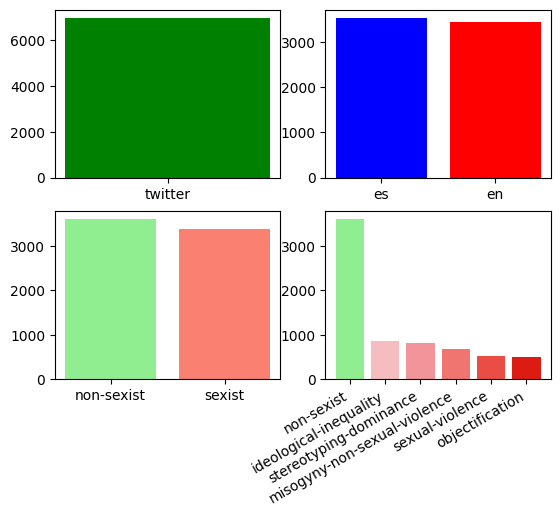

In [4]:
# Crea una figura con dos filas y dos columnas para cuatro gráficos
fig, axs = plt.subplots(2, 2)

# Columnas a analizar y sus posiciones dentro de una figura
column_chart_positions = {
    "source": (0,0), 
    "language": (0,1), 
    "task1": (1,0), 
    "task2": (1,1)
}

# Colores para las etiquetas de las columnas a graficas
column_chart_colors = {
    "source": ["green", "cyan"], 
    "language": ["blue", "red"], 
    "task1": ["lightgreen", "salmon"], 
    "task2": ["lightgreen", "#f6bdc0", "#f1959b", "#f07470", "#ea4c46", "#dc1c13"]
}

for column in column_chart_positions:
    frequency = dict(Counter(list(training_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])
        
plt.xticks(rotation=30, ha='right')       
plt.show()

Si se replica el mismo análisis de frecuencias sobre el dataset de **validación** se pueden determinar los siguientes aspectos:

* A diferencia del conjunto de entrenamiento, en este sí que **aparecen textos procedentes de la red social Gab** aunque en una cifra sumamente **minoritaria** con respecto al número de tweets.

* Si bien el volumen de documentos en inglés y español continua siendo equilibrado, en este conjunto es el inglés el que cuenta con una mayor representatividad.

* Adicionalmente también se modifica el *ranking* de las categorías sexistas, siendo la misoginia una de las más voluminosas a diferencia del dataset de entrenamiento.

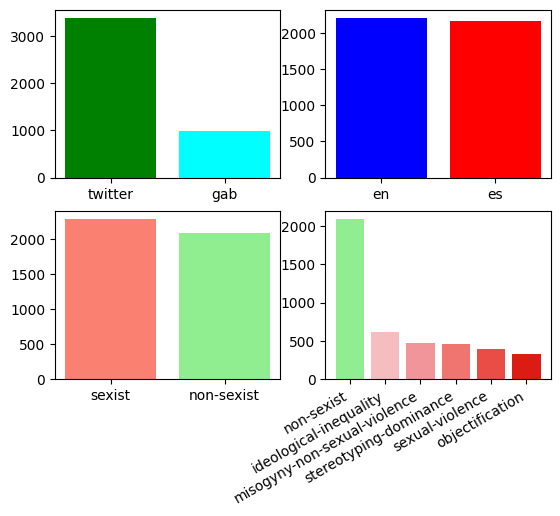

In [5]:
# Crea una figura con dos filas y dos columnas para cuatro gráficos
fig, axs = plt.subplots(2, 2)

# Columnas a analizar y sus posiciones dentro de una figura
column_chart_positions = {
    "source": (0,0), 
    "language": (0,1), 
    "task1": (1,0), 
    "task2": (1,1)
}

# Colores para las etiquetas de las columnas a graficas
column_chart_colors = {
    "source": ["green", "cyan"], 
    "language": ["blue", "red"], 
    "task1": ["salmon", "lightgreen"], 
    "task2": ["lightgreen", "#f6bdc0", "#f1959b", "#f07470", "#ea4c46", "#dc1c13"]
}

for column in column_chart_positions:
    frequency = dict(Counter(list(testing_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])
        
plt.xticks(rotation=30, ha='right')       
plt.show()

## 9. Análisis de textos

En esta última sección el objetivo consiste en realizar diversos análisis estadísticos y visualizaciones basadas en técnicas de **Procesamiento del Lenguaje Natural** (*NLP*). Como paso previo es necesario aplicar algunos métodos de procesamiento basados en textos con los que limpiar y preparar los documentos objetivos.

### 9.1. Procesamiento de textos

Las técnicas elegidas han sido fundamentadas en **análisis exploratorios visuales de los textos** con el fin de comprobar el tipo de caracteres que contienen y el grado de información que aportan para futuros estudios.

1. Eliminar direcciones URL, menciones de usuarios y *hashtags*.
2. Eliminar todos aquellos caracteres no alfabéticos.
3. Eliminar *stopwords*, en inglés y en español, sin perder las estructuras de los textos.
4. Convertir todos los caracteres restantes a minúsculas.

In [34]:
def process_text_dataset(dataset):
    # Elimina direcciones URL
    dataset["cleaned_text"] = dataset["text"].apply(lambda x: re.split("https:\/\/.*", str(x))[0])

    # Elimina menciones de usuarios
    dataset["cleaned_text"] = dataset["cleaned_text"].str \
        .replace("@([a-zA-Z0-9_]{1,50})", "", regex=True) 
    
    # Elimina hashtags
    dataset["cleaned_text"] = dataset["cleaned_text"].str.replace("#([a-zA-Z0-9_]{1,50})", "", regex=True)
        
    # Elimina caracteres no alfabéticos
    dataset["cleaned_text"] = dataset["cleaned_text"].str.replace("[^a-zA-Z ]", "")

    # Elimina stopwords en inglés y español sin desestructurar los textos
    stopwords = nltk.corpus.stopwords.words("english", "spanish")
    dataset["cleaned_text"] = dataset["cleaned_text"].apply(
        lambda x: " ".join([word for word in x.split() if word not in stopwords]))

    # Convierte todos los caracteres a minúsculas
    dataset["cleaned_text"] = dataset["cleaned_text"].str.lower()

    return dataset